In [57]:
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import matplotlib.pyplot as plt ## 차트 그리기 모듈 matplotlib import scipy.stats as stats ## 통계 등 과학용 모듈 scipy
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 분석을 위해 CALL_CHICKEN_11MONTH.csv 로 부터 dataFrame 을 얻도록 한다.
df1 = pd.read_csv('./csv files/china/CALL_CHICKEN_11MONTH.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47647 entries, 0 to 47646
Data columns (total 9 columns):
기준일     47647 non-null int64
요일      47647 non-null object
성별      47647 non-null object
연령대     47647 non-null object
시도      47647 non-null object
시군구     47647 non-null object
읍면동     47647 non-null object
업종      47647 non-null object
통화건수    47647 non-null int64
dtypes: int64(2), object(7)
memory usage: 2.0+ MB


## 11월 치킨 이용 분석 데이터를 불러옵니다.

In [58]:
df1.head()

,기준일,요일,성별,연령대,시도,시군구,읍면동,업종,통화건수
0,20161101,화,남,10대,서울특별시,강남구,일원동,치킨,5
1,20161101,화,남,10대,서울특별시,강남구,역삼동,치킨,7
2,20161101,화,여,30대,서울특별시,강남구,대치동,치킨,5
3,20161101,화,남,10대,서울특별시,강남구,도곡동,치킨,5
4,20161101,화,여,20대,서울특별시,강남구,논현동,치킨,13


In [59]:
df1.tail()

,기준일,요일,성별,연령대,시도,시군구,읍면동,업종,통화건수
47642,20161130,수,남,20대,서울특별시,중랑구,망우동,치킨,5
47643,20161130,수,남,10대,서울특별시,중랑구,묵동,치킨,5
47644,20161130,수,여,20대,서울특별시,중랑구,면목동,치킨,29
47645,20161130,수,여,50대,서울특별시,중랑구,신내동,치킨,5
47646,20161130,수,남,10대,서울특별시,중랑구,상봉동,치킨,5


## 11월 중국집 이용 분석 데이터를 불러옵니다

In [60]:
# 분석을 위해 CALL_CFOOD_11MONTH.csv 로 부터 dataFrame 을 얻도록 한다.
df2 = pd.read_csv('./csv files/china/CALL_CFOOD_11MONTH.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47675 entries, 0 to 47674
Data columns (total 9 columns):
기준일     47675 non-null int64
요일      47675 non-null object
성별      47675 non-null object
연령대     47675 non-null object
시도      47675 non-null object
시군구     47675 non-null object
읍면동     47675 non-null object
업종      47675 non-null object
통화건수    47675 non-null int64
dtypes: int64(2), object(7)
memory usage: 2.0+ MB


In [61]:
df2.head()

,기준일,요일,성별,연령대,시도,시군구,읍면동,업종,통화건수
0,20161101,화,남,10대,서울특별시,강남구,일원동,중국집,5
1,20161101,화,남,10대,서울특별시,강남구,역삼동,중국집,5
2,20161101,화,여,30대,서울특별시,강남구,대치동,중국집,7
3,20161101,화,여,20대,서울특별시,강남구,논현동,중국집,24
4,20161101,화,남,20대,서울특별시,강남구,신사동,중국집,5


In [62]:
df2.tail()

,기준일,요일,성별,연령대,시도,시군구,읍면동,업종,통화건수
47670,20161130,수,여,60대이상,서울특별시,중랑구,신내동,중국집,5
47671,20161130,수,남,20대,서울특별시,중랑구,망우동,중국집,5
47672,20161130,수,남,10대,서울특별시,중랑구,묵동,중국집,5
47673,20161130,수,여,20대,서울특별시,중랑구,면목동,중국집,13
47674,20161130,수,여,50대,서울특별시,중랑구,신내동,중국집,5


## 11월 한달간 치킨집 이용 연령별, 요일별 통화건수

In [63]:
df1 = pd.pivot_table(df1,'통화건수', aggfunc = sum, index=['요일'], columns='연령대')
df3 = df1[['10대', '20대', '30대', '40대', '50대', '60대이상']]
df3

연령대,10대,20대,30대,40대,50대,60대이상
요일,,,,,,
금,7979,16736,26483,24103,8866,4735
목,6652,14299,19356,17501,7611,4057
수,7649,17280,23491,20695,9033,5089
월,5247,12439,15273,12690,6253,3617
일,7764,18427,25264,22878,8743,4711
토,9580,19861,28373,27296,10244,5364
화,7234,17127,21760,19244,8588,4944


In [64]:
pd.DataFrame(df3, index=['월', '화', '수', '목', '금', '토', '일'])

연령대,10대,20대,30대,40대,50대,60대이상
월,5247,12439,15273,12690,6253,3617
화,7234,17127,21760,19244,8588,4944
수,7649,17280,23491,20695,9033,5089
목,6652,14299,19356,17501,7611,4057
금,7979,16736,26483,24103,8866,4735
토,9580,19861,28373,27296,10244,5364
일,7764,18427,25264,22878,8743,4711


## 11월 한달간 중국집 이용 연령별, 요일별 통화건수

In [65]:
df2 = pd.pivot_table(df2,'통화건수', aggfunc = sum, index=['요일'], columns='연령대')
df4 = df2[['10대', '20대', '30대', '40대', '50대', '60대이상']] 
df4

연령대,10대,20대,30대,40대,50대,60대이상
요일,,,,,,
금,3876,11147,18115,17128,10849,7473
목,3824,10793,16849,16540,10203,7151
수,4609,13678,20968,20297,12624,8608
월,3273,10334,15159,14666,9540,6804
일,4710,13619,23433,22605,11994,7659
토,5064,13522,23895,24100,12533,8336
화,4232,13275,19895,19036,12390,8625


In [66]:
pd.DataFrame(df4, index=['월', '화', '수', '목', '금', '토', '일'])

연령대,10대,20대,30대,40대,50대,60대이상
월,3273,10334,15159,14666,9540,6804
화,4232,13275,19895,19036,12390,8625
수,4609,13678,20968,20297,12624,8608
목,3824,10793,16849,16540,10203,7151
금,3876,11147,18115,17128,10849,7473
토,5064,13522,23895,24100,12533,8336
일,4710,13619,23433,22605,11994,7659


- 치킨 이용현황 바차트

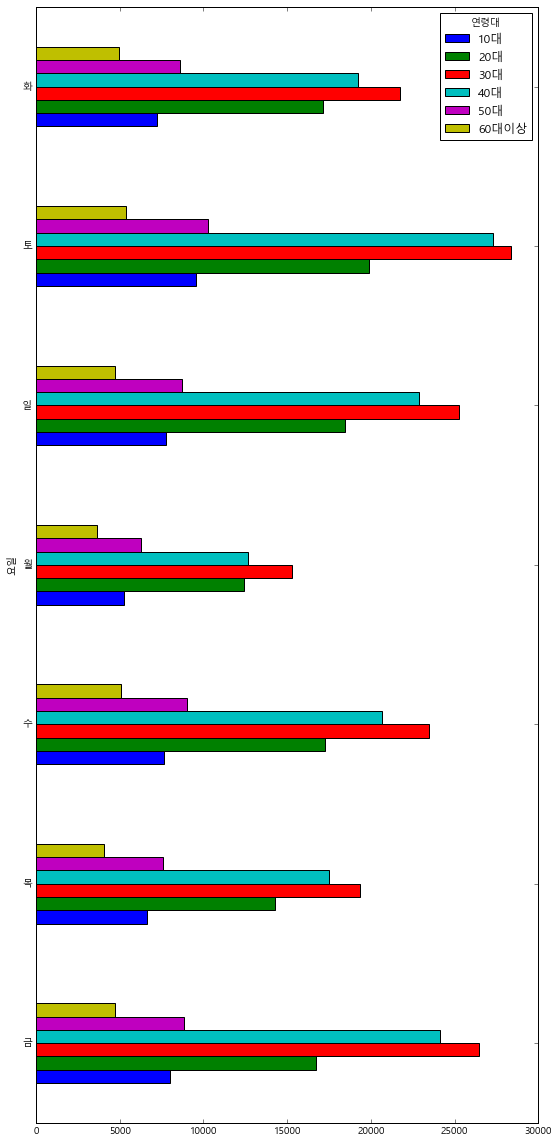

In [67]:
df3.plot(kind='barh', figsize = (9, 20))
plt.show()

- 중국집 이용현황 바차트

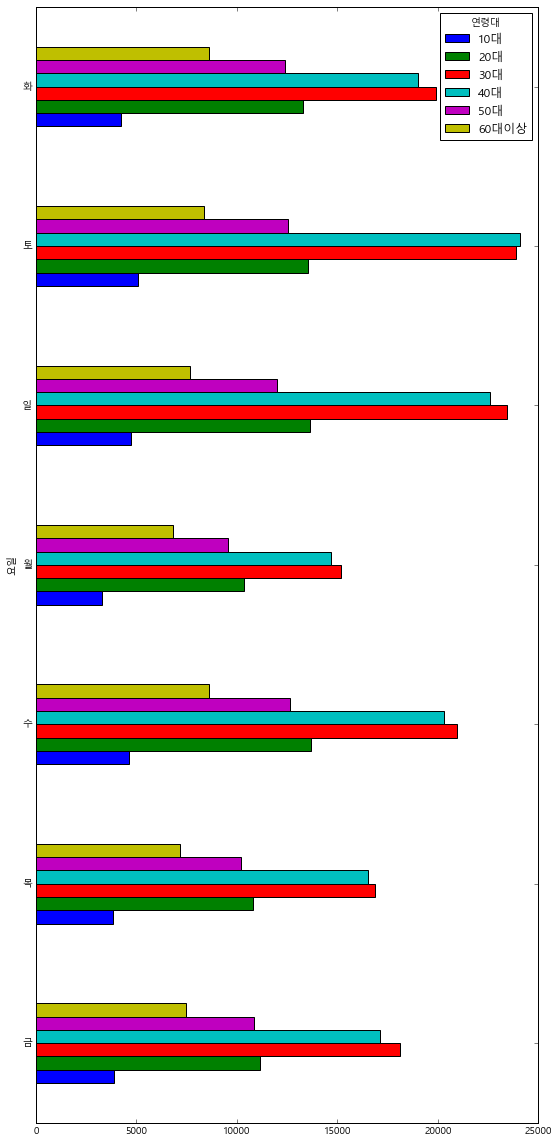

In [50]:
df4.plot(kind='barh', figsize = (9, 20))
plt.show()

In [70]:
df3 = pd.DataFrame(df3, 
                   columns=['10대', '20대', '30대', '40대', '50대', '60대이상', '합계'],
                   index=['월', '화', '수', '목', '금', '토', '일', '합계'])

df3["합계"] = df3.sum(axis=1)
df3.ix['합계'] = df3.sum()
df3

,10대,20대,30대,40대,50대,60대이상,합계
월,5247.0,12439.0,15273.0,12690.0,6253.0,3617.0,55519.0
화,7234.0,17127.0,21760.0,19244.0,8588.0,4944.0,78897.0
수,7649.0,17280.0,23491.0,20695.0,9033.0,5089.0,83237.0
목,6652.0,14299.0,19356.0,17501.0,7611.0,4057.0,69476.0
금,7979.0,16736.0,26483.0,24103.0,8866.0,4735.0,88902.0
토,9580.0,19861.0,28373.0,27296.0,10244.0,5364.0,100718.0
일,7764.0,18427.0,25264.0,22878.0,8743.0,4711.0,87787.0
합계,52105.0,116169.0,160000.0,144407.0,59338.0,32517.0,564536.0


In [71]:
df4 = pd.DataFrame(df4, 
                   columns=['10대', '20대', '30대', '40대', '50대', '60대이상', '합계'],
                   index=['월', '화', '수', '목', '금', '토', '일', '합계'])

df4["합계"] = df4.sum(axis=1)
df4.ix['합계'] = df4.sum()
df4

,10대,20대,30대,40대,50대,60대이상,합계
월,3273.0,10334.0,15159.0,14666.0,9540.0,6804.0,59776.0
화,4232.0,13275.0,19895.0,19036.0,12390.0,8625.0,77453.0
수,4609.0,13678.0,20968.0,20297.0,12624.0,8608.0,80784.0
목,3824.0,10793.0,16849.0,16540.0,10203.0,7151.0,65360.0
금,3876.0,11147.0,18115.0,17128.0,10849.0,7473.0,68588.0
토,5064.0,13522.0,23895.0,24100.0,12533.0,8336.0,87450.0
일,4710.0,13619.0,23433.0,22605.0,11994.0,7659.0,84020.0
합계,29588.0,86368.0,138314.0,134372.0,80133.0,54656.0,523431.0


## 치킨집 이용과 중국집 이용 현황을 보게되면 대체로 30대의 구매비율이 가장 높고 그 다음 40대의 구매비율이 높은것을 볼 수 있다

In [72]:
from pandas import Series, DataFrame

frame1 = DataFrame(df3)
frame1

,10대,20대,30대,40대,50대,60대이상,합계
월,5247.0,12439.0,15273.0,12690.0,6253.0,3617.0,55519.0
화,7234.0,17127.0,21760.0,19244.0,8588.0,4944.0,78897.0
수,7649.0,17280.0,23491.0,20695.0,9033.0,5089.0,83237.0
목,6652.0,14299.0,19356.0,17501.0,7611.0,4057.0,69476.0
금,7979.0,16736.0,26483.0,24103.0,8866.0,4735.0,88902.0
토,9580.0,19861.0,28373.0,27296.0,10244.0,5364.0,100718.0
일,7764.0,18427.0,25264.0,22878.0,8743.0,4711.0,87787.0
합계,52105.0,116169.0,160000.0,144407.0,59338.0,32517.0,564536.0


### 한글 columns사용시 일부 함수가 적용되지 않아, 영문 Columns으로 변경해서 분석을 진행했다

In [74]:
df3.columns = ['10yr', '20yr', '30yr', '40yr', '50yr', 'over60yr', 'total']
df3

,10yr,20yr,30yr,40yr,50yr,over60yr,total
월,5247.0,12439.0,15273.0,12690.0,6253.0,3617.0,55519.0
화,7234.0,17127.0,21760.0,19244.0,8588.0,4944.0,78897.0
수,7649.0,17280.0,23491.0,20695.0,9033.0,5089.0,83237.0
목,6652.0,14299.0,19356.0,17501.0,7611.0,4057.0,69476.0
금,7979.0,16736.0,26483.0,24103.0,8866.0,4735.0,88902.0
토,9580.0,19861.0,28373.0,27296.0,10244.0,5364.0,100718.0
일,7764.0,18427.0,25264.0,22878.0,8743.0,4711.0,87787.0
합계,52105.0,116169.0,160000.0,144407.0,59338.0,32517.0,564536.0


In [76]:
df3.index = ['monday', 'tuesday', 'wendsday', 'tursday', 'friday', 'saturday', 'sunday', 'Total']  
df3

,10yr,20yr,30yr,40yr,50yr,over60yr,total
monday,5247.0,12439.0,15273.0,12690.0,6253.0,3617.0,55519.0
tuesday,7234.0,17127.0,21760.0,19244.0,8588.0,4944.0,78897.0
wendsday,7649.0,17280.0,23491.0,20695.0,9033.0,5089.0,83237.0
tursday,6652.0,14299.0,19356.0,17501.0,7611.0,4057.0,69476.0
friday,7979.0,16736.0,26483.0,24103.0,8866.0,4735.0,88902.0
saturday,9580.0,19861.0,28373.0,27296.0,10244.0,5364.0,100718.0
sunday,7764.0,18427.0,25264.0,22878.0,8743.0,4711.0,87787.0
Total,52105.0,116169.0,160000.0,144407.0,59338.0,32517.0,564536.0


In [77]:
df4.columns = ['10y', '20y', '30y', '40y', '50y', 'over60y', 'total']
df4

,10y,20y,30y,40y,50y,over60y,total
월,3273.0,10334.0,15159.0,14666.0,9540.0,6804.0,59776.0
화,4232.0,13275.0,19895.0,19036.0,12390.0,8625.0,77453.0
수,4609.0,13678.0,20968.0,20297.0,12624.0,8608.0,80784.0
목,3824.0,10793.0,16849.0,16540.0,10203.0,7151.0,65360.0
금,3876.0,11147.0,18115.0,17128.0,10849.0,7473.0,68588.0
토,5064.0,13522.0,23895.0,24100.0,12533.0,8336.0,87450.0
일,4710.0,13619.0,23433.0,22605.0,11994.0,7659.0,84020.0
합계,29588.0,86368.0,138314.0,134372.0,80133.0,54656.0,523431.0


In [78]:
df4.index = ['monday', 'tuesday', 'wendsday', 'tursday', 'friday', 'saturday', 'sunday', 'Total']  
df4

,10y,20y,30y,40y,50y,over60y,total
monday,3273.0,10334.0,15159.0,14666.0,9540.0,6804.0,59776.0
tuesday,4232.0,13275.0,19895.0,19036.0,12390.0,8625.0,77453.0
wendsday,4609.0,13678.0,20968.0,20297.0,12624.0,8608.0,80784.0
tursday,3824.0,10793.0,16849.0,16540.0,10203.0,7151.0,65360.0
friday,3876.0,11147.0,18115.0,17128.0,10849.0,7473.0,68588.0
saturday,5064.0,13522.0,23895.0,24100.0,12533.0,8336.0,87450.0
sunday,4710.0,13619.0,23433.0,22605.0,11994.0,7659.0,84020.0
Total,29588.0,86368.0,138314.0,134372.0,80133.0,54656.0,523431.0


이제 치킨집과 중국집 데이터를 합쳤습니다.

In [93]:
df5 = pd.merge(df3, df4, how = 'outer', right_index= True, left_index = True)
df5

,10yr,20yr,30yr,40yr,50yr,over60yr,total_x,10y,20y,30y,40y,50y,over60y,total_y
monday,5247.0,12439.0,15273.0,12690.0,6253.0,3617.0,55519.0,3273.0,10334.0,15159.0,14666.0,9540.0,6804.0,59776.0
tuesday,7234.0,17127.0,21760.0,19244.0,8588.0,4944.0,78897.0,4232.0,13275.0,19895.0,19036.0,12390.0,8625.0,77453.0
wendsday,7649.0,17280.0,23491.0,20695.0,9033.0,5089.0,83237.0,4609.0,13678.0,20968.0,20297.0,12624.0,8608.0,80784.0
tursday,6652.0,14299.0,19356.0,17501.0,7611.0,4057.0,69476.0,3824.0,10793.0,16849.0,16540.0,10203.0,7151.0,65360.0
friday,7979.0,16736.0,26483.0,24103.0,8866.0,4735.0,88902.0,3876.0,11147.0,18115.0,17128.0,10849.0,7473.0,68588.0
saturday,9580.0,19861.0,28373.0,27296.0,10244.0,5364.0,100718.0,5064.0,13522.0,23895.0,24100.0,12533.0,8336.0,87450.0
sunday,7764.0,18427.0,25264.0,22878.0,8743.0,4711.0,87787.0,4710.0,13619.0,23433.0,22605.0,11994.0,7659.0,84020.0
Total,52105.0,116169.0,160000.0,144407.0,59338.0,32517.0,564536.0,29588.0,86368.0,138314.0,134372.0,80133.0,54656.0,523431.0


In [100]:
df6 = df5.ix[0:7, ["10yr", "20yr", "30yr", "40yr", "50yr", "over60yr", "10y", "20y", "30y", "40y", "50y", "over60y"]]
df6

,10yr,20yr,30yr,40yr,50yr,over60yr,10y,20y,30y,40y,50y,over60y
monday,5247.0,12439.0,15273.0,12690.0,6253.0,3617.0,3273.0,10334.0,15159.0,14666.0,9540.0,6804.0
tuesday,7234.0,17127.0,21760.0,19244.0,8588.0,4944.0,4232.0,13275.0,19895.0,19036.0,12390.0,8625.0
wendsday,7649.0,17280.0,23491.0,20695.0,9033.0,5089.0,4609.0,13678.0,20968.0,20297.0,12624.0,8608.0
tursday,6652.0,14299.0,19356.0,17501.0,7611.0,4057.0,3824.0,10793.0,16849.0,16540.0,10203.0,7151.0
friday,7979.0,16736.0,26483.0,24103.0,8866.0,4735.0,3876.0,11147.0,18115.0,17128.0,10849.0,7473.0
saturday,9580.0,19861.0,28373.0,27296.0,10244.0,5364.0,5064.0,13522.0,23895.0,24100.0,12533.0,8336.0
sunday,7764.0,18427.0,25264.0,22878.0,8743.0,4711.0,4710.0,13619.0,23433.0,22605.0,11994.0,7659.0


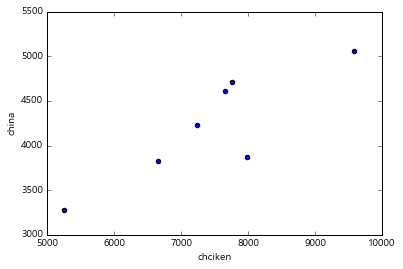

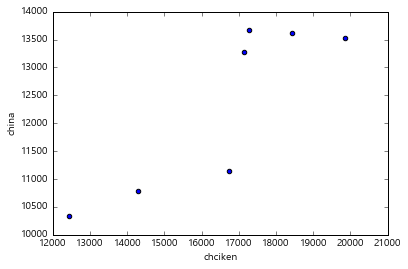

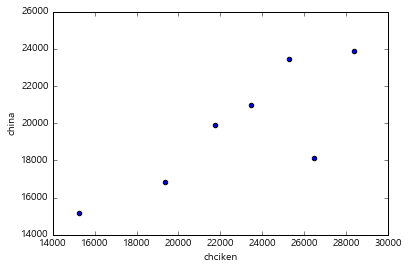

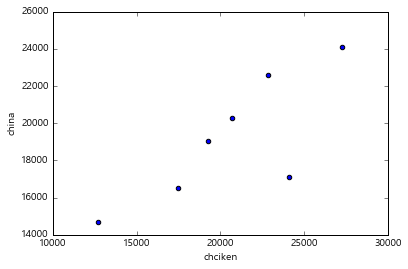

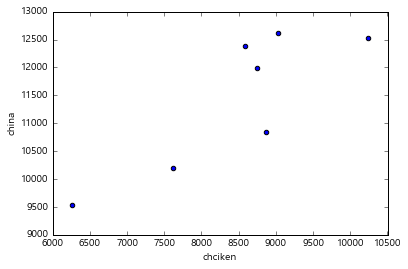

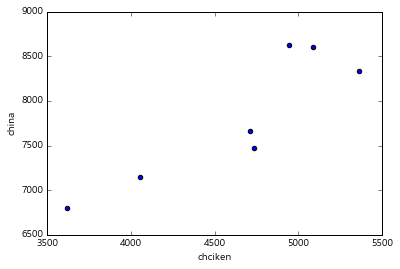

In [101]:
df6.plot(kind='scatter', x='10yr', y='10y')
plt.xlabel("chciken") 
plt.ylabel("china")

df6.plot(kind='scatter', x='20yr', y='20y')
plt.xlabel("chciken") 
plt.ylabel("china")

df6.plot(kind='scatter', x='30yr', y='30y')
plt.xlabel("chciken") 
plt.ylabel("china")

df6.plot(kind='scatter', x='40yr', y='40y')
plt.xlabel("chciken") 
plt.ylabel("china")

df6.plot(kind='scatter', x='50yr', y='50y')
plt.xlabel("chciken") 
plt.ylabel("china")

df6.plot(kind='scatter', x='over60yr', y='over60y')

plt.xlabel("chciken") 
plt.ylabel("china")
plt.show()

## 재미있는 결과는 10대부터 40대 까지는 치킨집의 이용비율이 중국집 이용비율 보다    높은 반면 50대 이상은 중국집 이용 비율이 높은 것을 확인 할 수 있다.

## 각 연령별 이용 분포를 보겠습니다. boxplot으로 그려봤습니다.

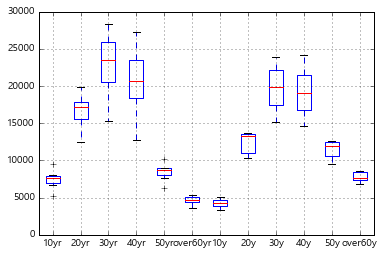

In [103]:
df6.boxplot(return_type='axes')
plt.show()

### 위 boxplot에서도 확인할 수 있듯이 10대 부터 40대 까지는 치킨집 이용 비율이 높고 50대부터 60대까지는 중국집 이용비율이 높은것을 확인할 수 있다.

서로 독립적인 두 집단에서 얻어진 수치형 자료로 부터 두 집단의 차이가 유의한지를 파악하는데는 독립표본 t-검정 (two independent sample t-test)이 유용합니다. scipy의 ttest_ind 함수를 이용하여 바로 계산이 가능합니다.

In [264]:
import scipy.stats as stats ## 통계 등 과학용 모듈 scipy
stats.ttest_ind(df3['10yr'], df4['10y'])


Ttest_indResult(statistic=5.8343871680230341, pvalue=8.030760337861762e-05)

In [265]:
stats.ttest_ind(df3['20yr'], df4['20y'])

Ttest_indResult(statistic=3.8680923607567705, pvalue=0.0022355977390758758)

In [266]:
stats.ttest_ind(df3['30yr'], df4['30y'])

Ttest_indResult(statistic=1.4754651930604941, pvalue=0.16583793591820883)

In [267]:
stats.ttest_ind(df3['40yr'], df4['40y'])

Ttest_indResult(statistic=0.64877257729391724, pvalue=0.52870619733790691)

In [268]:
stats.ttest_ind(df3['50yr'], df4['50y'])

Ttest_indResult(statistic=-4.4572346912118102, pvalue=0.00078291256170321788)

In [269]:
stats.ttest_ind(df3['over60yr'], df4['over60y'])

Ttest_indResult(statistic=-8.8377166505364606, pvalue=1.3374423590581811e-06)

### 피어슨 상관관계 분석

In [278]:
stats.pearsonr(df3['10yr'], df4['10y'])

(0.86920796880838713, 0.011060590652652615)

In [279]:
stats.pearsonr(df3['20yr'], df4['20y'])

(0.86011606328799728, 0.013017489651034124)